# Necessary Imports

In [11]:
conda install -c anaconda py-xgboost


Note: you may need to restart the kernel to use updated packages.Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  anaconda
    ca-certificates-2023.01.10 |       haa95532_0         158 KB  anaconda
    certifi-2020.6.20          |     pyhd3eb1b0_3         159 KB  anaconda
    conda-23.7.4               |  py311haa95532_0         1.3 MB
    libxgboost-1.7.3           |       hd77b12b_0         2.6 MB  anaconda
    openssl-1.1.1w             |       h2bbff1b_0         5.5 MB
    py-xgboost-1.7.3           |  py311haa95532_0         274 KB
    ------------------------------------------------------------
                                     

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier

# Reading CSV

In [2]:
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


name - ASCII subject name and recording number <br>
MDVP:Fo(Hz) - Average vocal fundamental frequency<br>
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency<br>
MDVP:Flo(Hz) - Minimum vocal fundamental frequency<br>
MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency<br>
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude<br>
NHR, HNR - Two measures of the ratio of noise to tonal components in the voice<br>
status - The health status of the subject (one) - Parkinson's, (zero) - healthy<br>
RPDE, D2 - Two nonlinear dynamical complexity measures<br>
DFA - Signal fractal scaling exponent<br>
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation<br>

# Exploratory Data Analysis (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Statistical Analysis

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Visualization of count

<Axes: ylabel='count'>

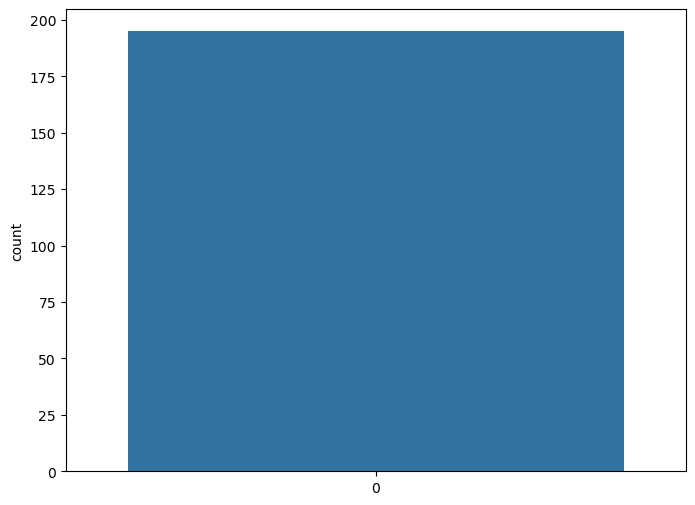

In [13]:
plt.figure(figsize = (8,6))
sns.countplot(df['status'])

<Axes: >

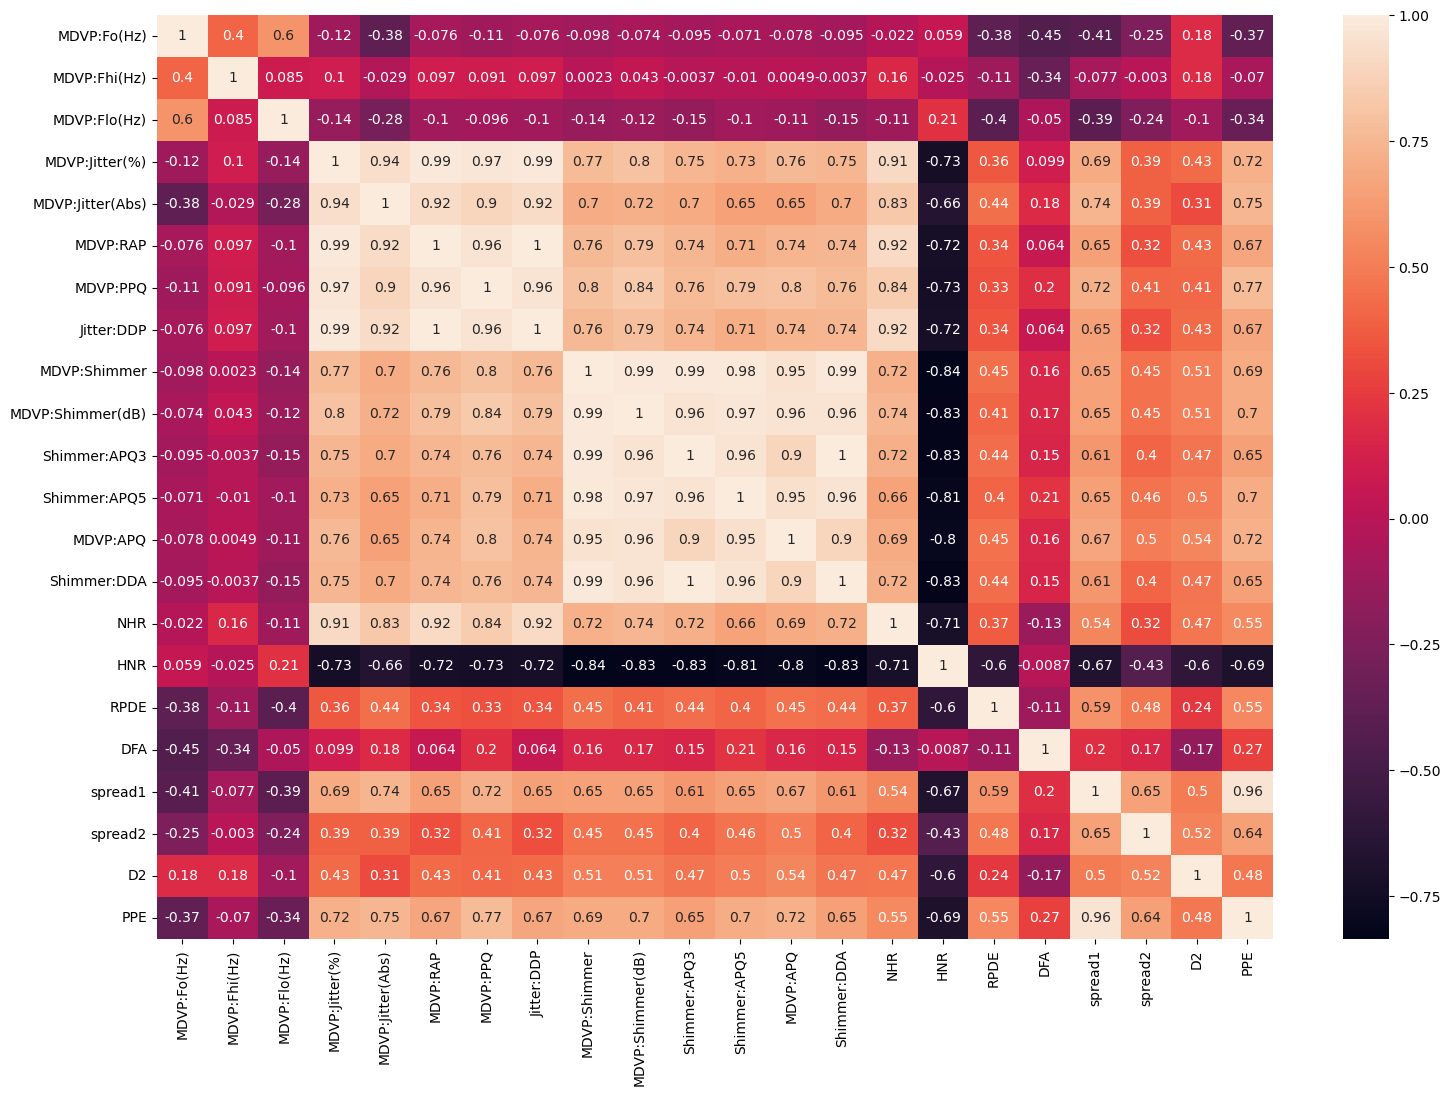

In [14]:
# Removing categorical or target features from the column list
feature_cols = df.columns.tolist()
feature_cols.remove('name')
feature_cols.remove('status')

# Plotting the heatmap of the correlation matrix
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)


<Axes: xlabel='MDVP:Jitter(%)', ylabel='MDVP:Shimmer'>

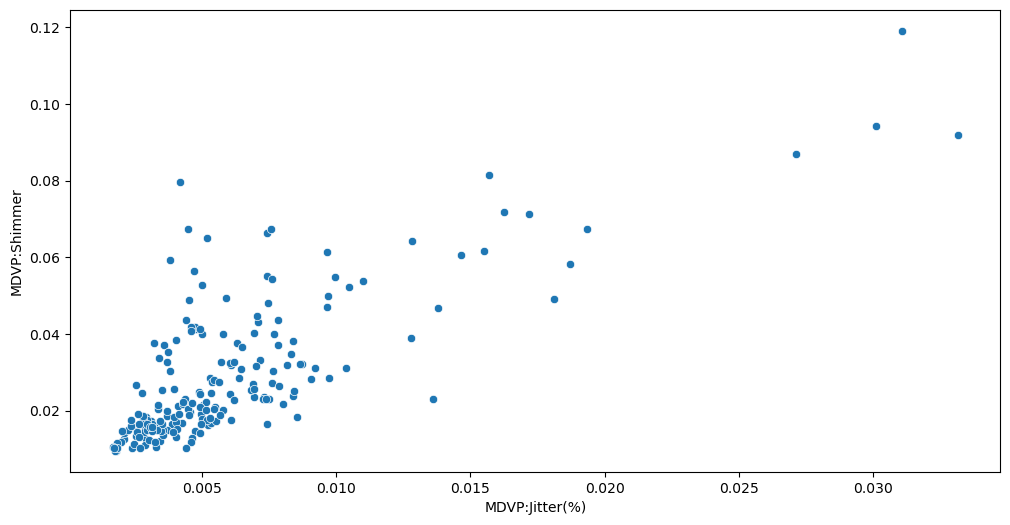

In [15]:
# scatter plot between MDVP:Jitter(%) and MDVP:Shimmer
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'MDVP:Jitter(%)', y = 'MDVP:Shimmer', data = df)

<Axes: xlabel='MDVP:Jitter(%)', ylabel='HNR'>

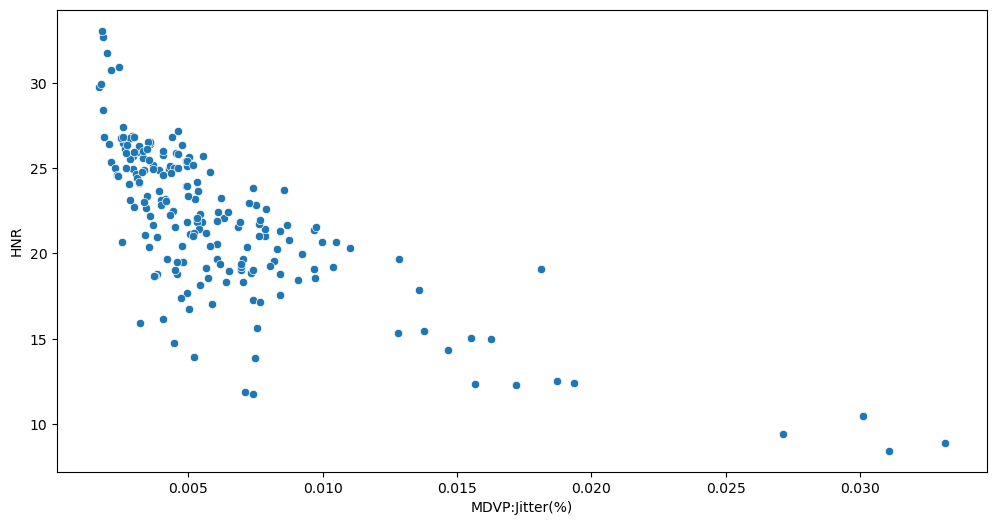

In [16]:
# scatter plot between MDVP:Jitter(%) and HNR
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'MDVP:Jitter(%)', y = 'HNR', data = df)


# Normalization and Train Test Split

In [17]:
# Normalize features
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(df[feature_cols])
y = df['status']

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)


# Decision Tree

In [18]:
# Initiate and fit Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
decision_tree_classifier.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_dt = decision_tree_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_dt, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_dt))


              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.90      0.81      0.85        32

    accuracy                           0.77        39
   macro avg       0.65      0.69      0.66        39
weighted avg       0.81      0.77      0.78        39

[[ 4  3]
 [ 6 26]]


# Random Forest

In [19]:
# Initialize Random Forest Model
random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 1234)
random_forest.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_rf = random_forest.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_rf, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_rf))


              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39

[[ 5  2]
 [ 1 31]]


# XGBoost Classifier 

In [20]:
# Initialize XGBoost Model
xgboost_classifier = XGBClassifier(n_estimators = 100, max_depth = 3, random_state = 1234)
xgboost_classifier.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_xgboost = xgboost_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_xgboost, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_xgboost))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39

[[ 5  2]
 [ 1 31]]
